In [1]:
import awkward as ak
import uproot
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep
import numpy as np
import pandas as pd
from coffea.util import load
import hist
import os
from pprint import pprint 
hep.style.use(hep.style.ROOT)
import vector
vector.register_awkward()
import hist
import numba

In [145]:
output_folder = "/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/RecoPlots/DataPlots/TTbar_MC_Run3/"
os.makedirs(output_folder, exist_ok=True)

In [129]:
df = [
{
"name": "default_run_32",
"legend" : "Baseline",
"nweights": 387966,
"npad_cls": 30,
"npad_rec": 60,
"t32":     161.626 #ms
},
{
"name": "default_run_32",
    "legend" : "Baseline",
"nweights": 387966,
"npad_cls": 15,
"npad_rec": 20,
"t32":     20.356 #ms
},
{
"name": "simpler_rechit_run_20",
"legend" : "Simpler rechits layer",
"nweights": 168860,
"npad_cls": 30,
"npad_rec": 60,
"t32":     34.543 #ms
},
{
"name": "simpler_rechit_run_20",
"legend" : "Simpler rechits layer",
"nweights": 168860,
"npad_cls": 15,
"npad_rec": 20,
"t32":    8.764 #ms
},
{
"name": "norechits_run_20",
"legend" : "No rechits layer",
"nweights": 371616,
"npad_cls": 30,
"npad_rec": 60,
"t32":    14.494#ms
},
{
"name": "norechits_run_20",
"legend" : "No rechits layer",
"nweights": 371616,
"npad_cls": 15,
"npad_rec": 20,
"t32":  7.988#ms
},
{
"name": "norechits_run_30",
"legend" : "No rechits layer",
"nweights": 164640,
"npad_cls": 30,
"npad_rec": 60,
"t32":    10.251 #ms
},
{
"name": "norechits_run_30",
"legend" : "No rechits layer",
"nweights": 164640,
"npad_cls": 15,
"npad_rec": 20,
"t32":    5.682 #ms
}

]

df = pd.DataFrame(df)

In [121]:
df

,name,legend,nweights,npad_cls,npad_rec,t32
0,default_run_32,Baseline,387966,30,60,161.626
1,default_run_32,Baseline,387966,15,20,20.356
2,simpler_rechit_run_20,Simpler rechits layer,168860,30,60,34.543
3,simpler_rechit_run_20,Simpler rechits layer,168860,15,20,8.764
4,norechits_run_20,No rechits layer,371616,30,60,14.494
5,norechits_run_20,No rechits layer,371616,15,20,7.988
6,norechits_run_30,No rechits layer,164640,30,60,10.251
7,norechits_run_30,No rechits layer,164640,15,20,5.682


In [118]:
df.t32

0    161.626
1     20.356
2     34.543
3      8.764
4     14.494
5      7.988
6     10.251
7      5.682
Name: t32, dtype: float64

In [126]:
for f in df_30: print(f)

name
legend
nweights
npad_cls
npad_rec
t32


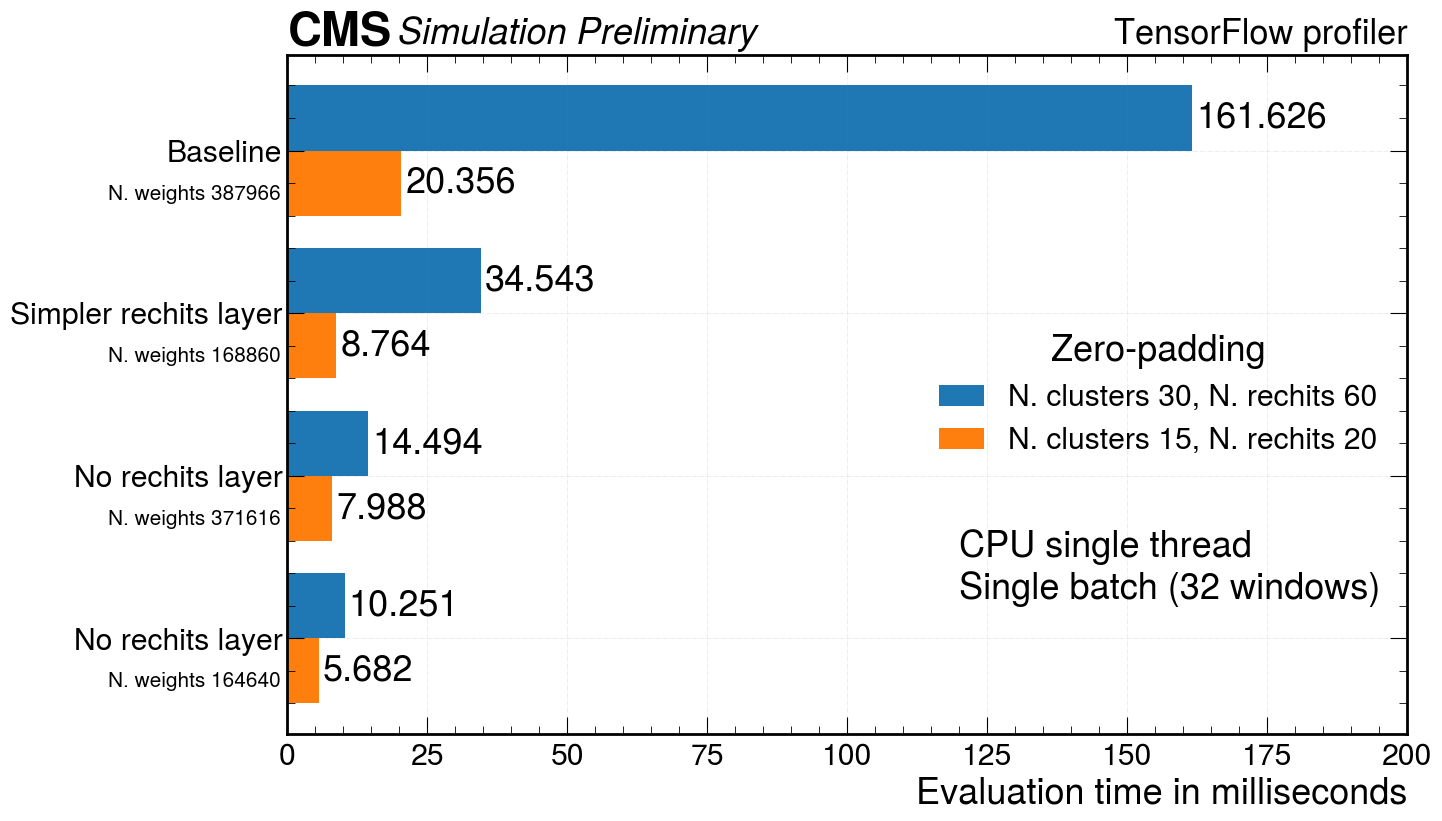

In [160]:
A = df[df.npad_cls==30].t32
B = df[df.npad_cls==15].t32

x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots(figsize =(16, 9), dpi=100)
rects1 = ax.barh(x - width/2, A, width, label='N. clusters 30, N. rechits 60')
rects2 = ax.barh(x + width/2, B, width, label='N. clusters 15, N. rechits 20')

ax.set_yticks(x)
df_30 = df[df.npad_cls==30]
labels = [f"{df_30.iloc[i].legend}" for i in range(4)]
lw = [f"{df_30.iloc[i].nweights}" for i in range(4)]

for i in range(4):
    ax.text(-32, x[i]+0.3, f"N. weights {lw[i]}", fontsize=15 )

ax.set_yticklabels(labels)
ax.set_xlim(0, 200.)
# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_yticklabels(x, labels)
leg = ax.legend(title="Zero-padding", loc="center right")
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

ax.grid(b = True, color ='grey',
         linestyle ='-.', linewidth = 0.5,
         alpha = 0.2)

ax.invert_yaxis()
ax.set_xlabel("Evaluation time in milliseconds")
ax.text(0.60, 0.2, "CPU single thread\nSingle batch (32 windows)", transform=ax.transAxes)
leg.get_frame().set_edgecolor('b')

hep.cms.label(llabel="Simulation Preliminary", rlabel="TensorFlow profiler", loc=0, ax=ax)

plt.subplots_adjust(left=0.2)

if output_folder!=None:
    os.makedirs(output_folder, exist_ok=True)
    fig.savefig(output_folder + f"/tf_profiler_timing.png")
    fig.savefig(output_folder + f"/tf_profiler_timing.pdf")
    fig.savefig(output_folder + f"/tf_profiler_timing.svg")
    